<h2> <span style="color: Red;"> Amr Rashad | Classification Models | HR dataset </span> </h2>

## <span style="color: LightBlue;"> 0. Outline </span>

1. Perform Data Exploration (Categorical & Numerical)
2. Answer the following questions:
    - Check whether there exists a correlation between the numerical variables
    - When are the employees most likely to leave the company?
    - Are the employees more dissatisfied during their first years in the company?
    - check which features are the reason why employees decide to leave the company? (we will explore number of projects, last evaluation, salary and satisfaction level)
    - Is there a significant satisfaction level difference between employees who decide to stay and employees who don't?
    - Same question for salary.
3. Running 4 classification models to determine which one gives the most accurate prediction
4. Evaluating the models and understand which features are the most important in explaining the employees decision to leave the company.

## <span style="color: IndianRed;"> 1. Loading The Dataset & Exploratory Data Analysis </span>

### <span style="color: LightSalmon;"> *1.1 Load Required Libraries:* </span>

In [1]:
library(MASS)
library(ggpubr)
library(olsrr)
library(dplyr)
library(purrr)
library (DescTools)
library(gplots)
library(car)
library(Hmisc)
library(PerformanceAnalytics)
library(olsrr)
library(ISLR)
library(rpart)
library(rpart.plot)
library(party)
library("partykit")
library(caTools)
library(caret)
library(randomForest)
library(ranger)
library(corrplot)
library(tidyverse)
library("magrittr")
library(gridExtra)
library(cowplot)
library(pROC)
library(ggcorrplot)
library(tree)
library(leaps)
library(class)
library("pROC")
library(lares)


Warning message:
"package 'ggpubr' was built under R version 4.1.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'olsrr' was built under R version 4.1.3"

Attaching package: 'olsrr'


The following object is masked from 'package:MASS':

    cement


The following object is masked from 'package:datasets':

    rivers



Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'DescTools' was built under R version 4.1.3"
Warning message:
"package 'gplots' was built under R version 4.1.3"
Registered S3 method overwritten by 'gplots':
  method         from     
  reorder.factor DescTools


Attaching package: 'gplots'


The following object is masked from 'package:DescTools':


### <span style="color: LightSalmon;"> *1.2 Load Dataset:* </span>

In [2]:
HR_dataset <- read.csv(file='HR_comma_sep.csv', stringsAsFactors=TRUE)
#making the variable more meaningful by adjusting its name to avoid confusion
colnames(HR_dataset)[7] <- "left_job"

In [3]:
str(HR_dataset)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_monthly_hours: int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left_job             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ dept                 : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


In [4]:
head(HR_dataset)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_job,promotion_last_5years,dept,salary
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.72,0.87,5,223,5,0,1,0,sales,low
5,0.37,0.52,2,159,3,0,1,0,sales,low
6,0.41,0.50,2,153,3,0,1,0,sales,low


### <span style="color: LightSalmon;"> *1.3 Data Preparation:* </span>

In [5]:
HR_clean <- data.frame(HR_dataset)

Other available 'return' options: "skimr", "numbers", "names", "distr"

Warning message in .font_global(font, quiet = FALSE):
"Font 'Arial Narrow' is not installed, has other name, or can't be found"


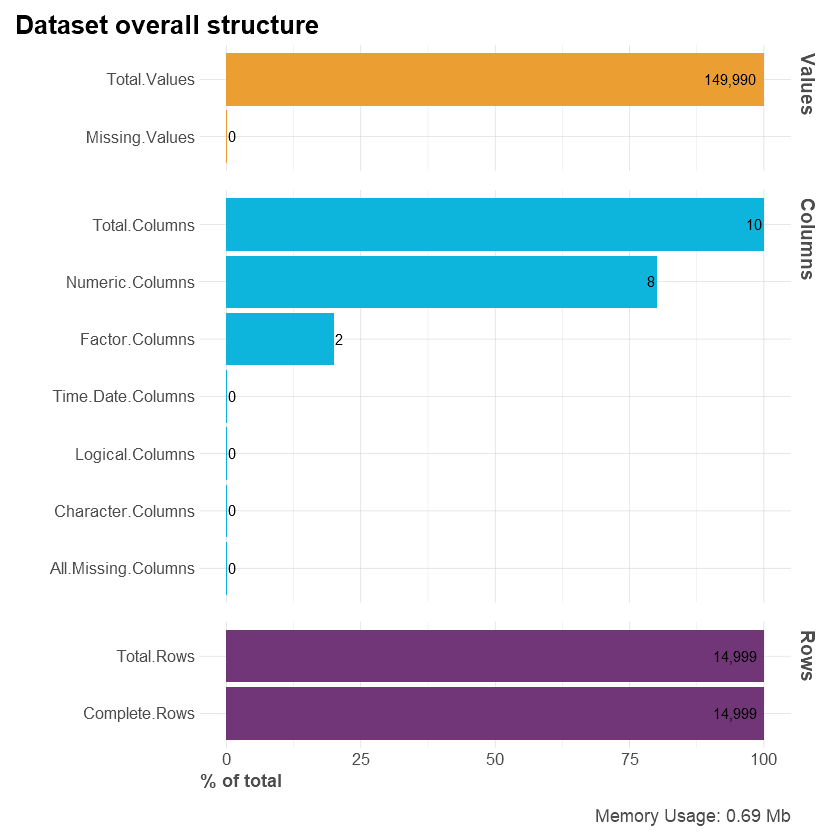

In [6]:
#Seeing the structure of the dataset
df_str(HR_clean, return = "plot")

In [7]:
HR_clean$left_job <-as.factor(plyr::mapvalues(HR_clean$left_job, from= c("0","1"), to= c("No","Yes")))
HR_clean$promotion_last_5years <-as.factor(plyr::mapvalues(HR_clean$promotion_last_5years, from= c("0","1"), to= c("No","Yes")))
HR_clean$work_accident <-as.factor(plyr::mapvalues(HR_clean$work_accident, from= c("0","1"), to= c("No","Yes")))
head(HR_clean)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_job,promotion_last_5years,dept,salary
,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0.38,0.53,2,157,3,No,Yes,No,sales,low
2,0.80,0.86,5,262,6,No,Yes,No,sales,medium
3,0.11,0.88,7,272,4,No,Yes,No,sales,medium
4,0.72,0.87,5,223,5,No,Yes,No,sales,low
5,0.37,0.52,2,159,3,No,Yes,No,sales,low
6,0.41,0.50,2,153,3,No,Yes,No,sales,low


### <span style="color: LightSalmon;"> *1.4 Data Exploration:* </span>

#### <span style="color: LightYellow;"> *1.4.1 Exploring The 'left_job' Distribution & Exploring The Dataset:* </span>

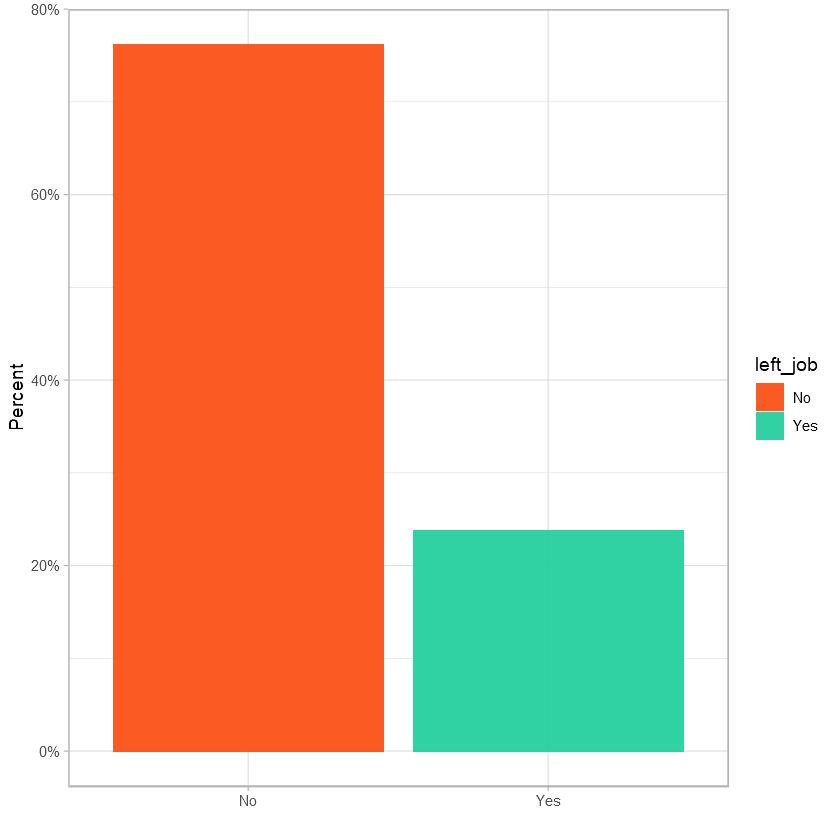

In [8]:
lj_plot <- ggplot(data = HR_clean, aes(x=left_job), y=count(left_job)) +geom_bar(aes(y = (..count..)/sum(..count..), fill = left_job)) + 
            scale_y_continuous(labels=scales::percent) + ylab("Percentage") +
            labs(y="Percent", x = ' ') +
            scale_fill_manual(labels = c("No", "Yes"), values = c("#fa5118", "#25ce9e")) +
            theme_light()
lj_plot

In [9]:
xtabs(~left_job, data = HR_clean)

left_job
   No   Yes 
11428  3571 

In [10]:
xtabs(~left_job + salary, data = HR_clean)

        salary
left_job high  low medium
     No  1155 5144   5129
     Yes   82 2172   1317

In [11]:
xtabs(~left_job + dept, data = HR_clean)

        dept
left_job accounting   hr   IT management marketing product_mng RandD sales
     No         563  524  954        539       655         704   666  3126
     Yes        204  215  273         91       203         198   121  1014
        dept
left_job support technical
     No     1674      2023
     Yes     555       697

In [12]:
xtabs(~left_job + promotion_last_5years, data = HR_clean)

        promotion_last_5years
left_job    No   Yes
     No  11128   300
     Yes  3552    19

In [13]:
xtabs(~left_job + work_accident, data = HR_clean)

        work_accident
left_job   No  Yes
     No  9428 2000
     Yes 3402  169

- It seems that our dataset is moderately imbalanced. This will be looked at more in detail when we come to running the classification models

#### <span style="color: LightYellow;"> *1.4.2 Categorical Variables Plots (salary, dept, promotion_last_5years, work_accident):* </span>

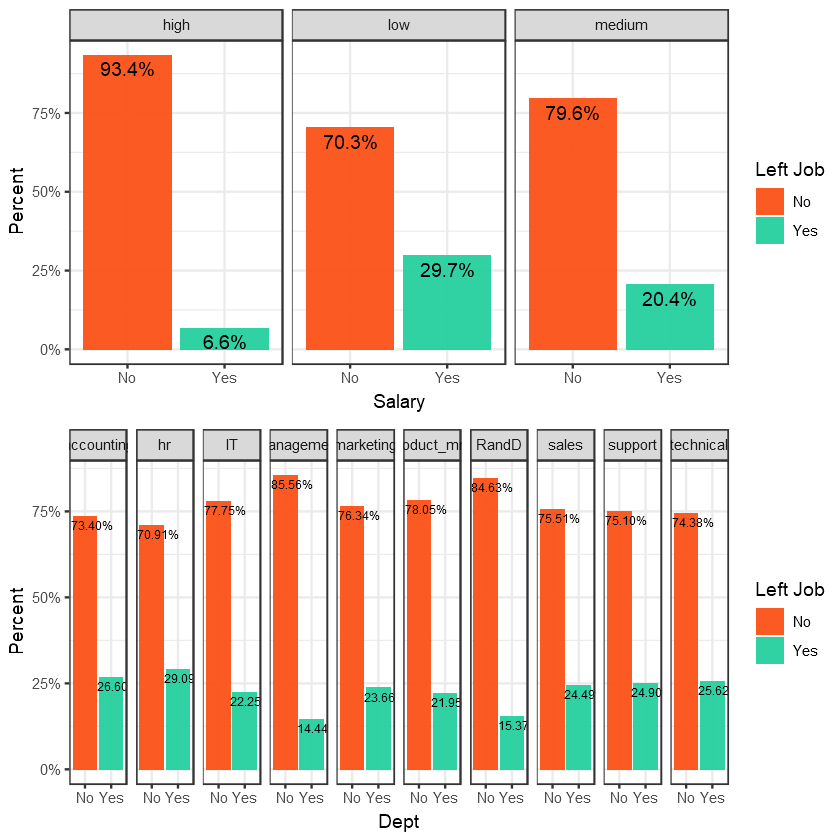

In [14]:
p_salary <- ggplot(HR_clean, aes(x=left_job, group = salary)) +
            geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat = "count") +
            geom_text(aes(label = scales::percent(..prop..), y = ..prop..), stat = "count", vjust = +1.5) + 
            labs(y="Percent", x = "Salary", fill = "Left Job") +
            scale_fill_manual(labels = c("No", "Yes"), values = c("#fa5118", "#25ce9e")) +
            facet_grid(~salary) +
            scale_y_continuous(labels=scales::percent) +
            theme_bw()

p_dept <- ggplot(HR_clean, aes(x=left_job, group = dept)) +
            geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat = "count") +
            geom_text(aes(label = scales::percent(..prop..), y = ..prop..), stat = "count", hjust = 0.34, vjust = 1.5, size = 2.5) + 
            labs(y="Percent", x = "Dept", fill = "Left Job") +
            scale_fill_manual(labels = c("No", "Yes"), values = c("#fa5118", "#25ce9e")) +
            facet_grid(~dept) +
            scale_y_continuous(labels=scales::percent) +
            theme_bw()
            
grid.arrange(p_salary, p_dept, heights = c(1,1))

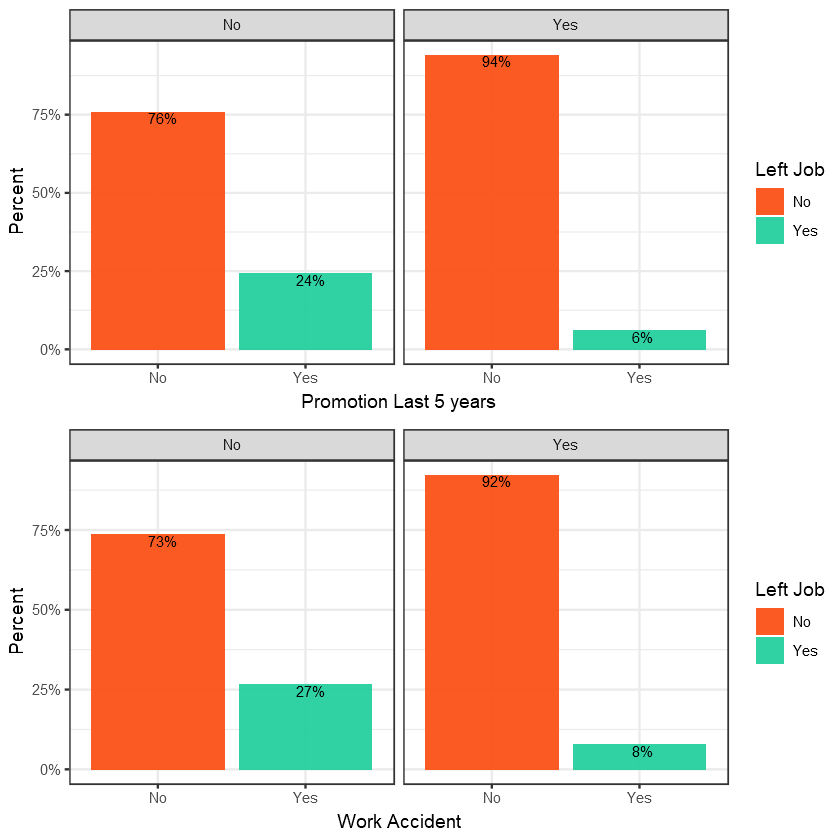

In [15]:
p_promoted <- ggplot(HR_clean, aes(x=left_job, group = promotion_last_5years)) +
            geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat = "count") +
            geom_text(aes(label = scales::percent(..prop..), y = ..prop..), stat = "count", hjust = 0.34, vjust = 1.1, size = 3) + 
            labs(y="Percent", x = "Promotion Last 5 years", fill = "Left Job") +
            scale_fill_manual(labels = c("No", "Yes"), values = c("#fa5118", "#25ce9e")) +
            facet_grid(~promotion_last_5years) +
            scale_y_continuous(labels=scales::percent) +
            theme_bw()

p_work_accident <- ggplot(HR_clean, aes(x=left_job, group = work_accident)) +
            geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat = "count") +
            geom_text(aes(label = scales::percent(..prop..), y = ..prop..), stat = "count", hjust = 0.34, vjust = 1.1, size = 3) + 
            labs(y="Percent", x = "Work Accident", fill = "Left Job") +
            scale_fill_manual(labels = c("No", "Yes"), values = c("#fa5118", "#25ce9e")) +
            facet_grid(~work_accident) +
            scale_y_continuous(labels=scales::percent) +
            theme_bw()
grid.arrange(p_promoted, p_work_accident, heights = c(1,1))

#### <span style="color: LightYellow;"> *1.4.3 Exploring If There Exist A Correlation Among The Numerical Variables (satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company):* </span>

In [16]:
num_data<-HR_clean %>% select(satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company)
rcorr(as.matrix(num_data))

                      satisfaction_level last_evaluation number_project
satisfaction_level                  1.00            0.11          -0.14
last_evaluation                     0.11            1.00           0.35
number_project                     -0.14            0.35           1.00
average_monthly_hours              -0.02            0.34           0.42
time_spend_company                 -0.10            0.13           0.20
                      average_monthly_hours time_spend_company
satisfaction_level                    -0.02              -0.10
last_evaluation                        0.34               0.13
number_project                         0.42               0.20
average_monthly_hours                  1.00               0.13
time_spend_company                     0.13               1.00

n= 14999 


P
                      satisfaction_level last_evaluation number_project
satisfaction_level                       0.0000          0.0000        
last_evaluation       0.0000   

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10
last_evaluation,0.11,1.00,0.35,0.34,0.13
number_project,-0.14,0.35,1.00,0.42,0.20
average_monthly_hours,-0.02,0.34,0.42,1.00,0.13
time_spend_company,-0.10,0.13,0.20,0.13,1.00


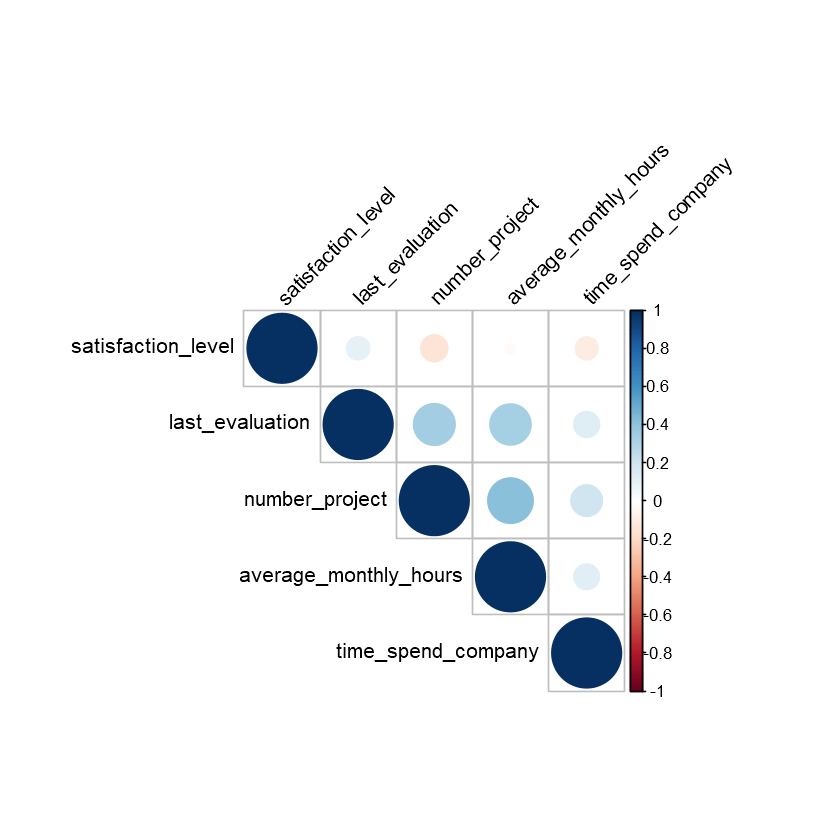

In [17]:
res<-cor(num_data) 
round(res, 2)
corrplot(res, type = "upper", 
         tl.col = "black", tl.srt = 45)

Looking at the correlogram, we can infer the following:
- There is a positive correlation between last evaluation and the other remaining numerical variables, which is very understandable.
- There is a negative correlation between satisfaction level and (number of projects, average monthly hours and time spend at the company). It's understandable that if the workload increases, the employee will be more dissatisfied (less satisfied in other words). However, what is interesting to note is the negative correlation between time spend at the company and the satisfaction level. This will require a bit more of digging to understand why that's the case. 

### <span style="color: LightSalmon;"> *1.5 Some Interesting Plots & Inferences:* </span>

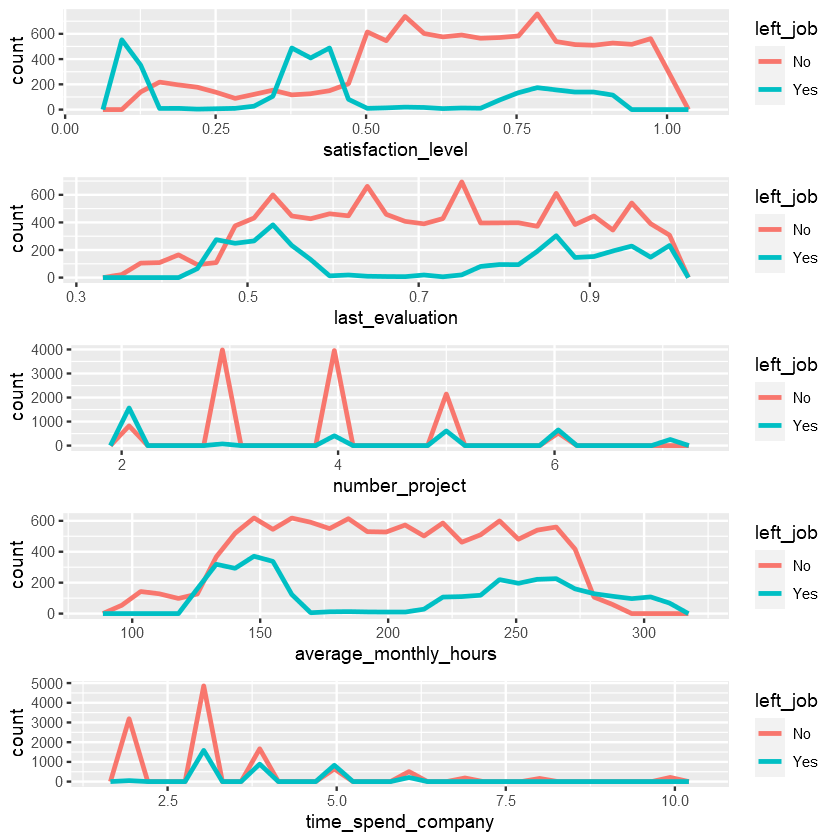

In [18]:
p_satisfaction <- ggplot(data = HR_clean, aes(satisfaction_level, color = left_job))+
  geom_freqpoly(bins = 30, size = 1)

p_last_evaluation <- ggplot(data = HR_clean, aes(last_evaluation, color = left_job))+
  geom_freqpoly(bins = 30, size = 1)

p_number_of_projects <- ggplot(data = HR_clean, aes(number_project, color = left_job))+
  geom_freqpoly(bins = 30, size = 1)

p_avg_monthly_hrs <- ggplot(data = HR_clean, aes(average_monthly_hours, color = left_job))+
  geom_freqpoly(bins = 30, size = 1)

p_time_spend_company <- ggplot(data = HR_clean, aes(time_spend_company, color = left_job))+
  geom_freqpoly(bins = 30, size = 1)

grid.arrange(p_satisfaction, p_last_evaluation, p_number_of_projects, p_avg_monthly_hrs, p_time_spend_company, heights = c(1,1,1,1,1))

- As per our last interpretation, it seems that the more the employee has been working for the company, the less likely they would leave. In the last graph we can notice that the number of employees who quit their job decrease, starting from around year 3, but the decrease is significant after the 5th year. Hence, we can infer that employees are more likely to leave within their first 5 years.
- The question that we would be interested in answering would be if employees are more dissatisfied at the beginning of their journey at the company (within 5 years, as per what we have determined from the last point.) 

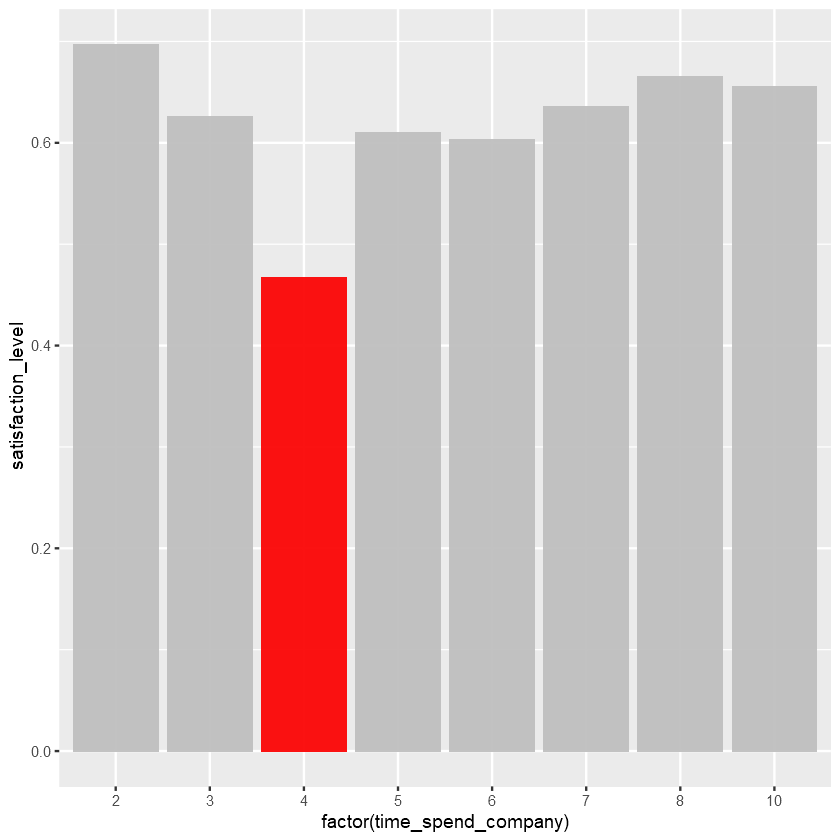

In [19]:
ggplot(HR_clean, aes(x = factor(time_spend_company)), y = satisfaction_level) + 
  geom_bar(stat = "summary", aes(y=satisfaction_level), fun = "mean", fill = c('grey', 'grey', '#fa0606', 'grey', 'grey', 'grey', 'grey', 'grey')) 

- Looking at the above graph, we can interpret that the satisfaction level does decrease when the employee is at the beginning of his journey in the company, lowest point is around year 4.
- This again confirms our interpretation that the unsatisfied employees leave during their first 4 to 5 years in the company.
- Satisfaction levels seem to increase during the 5th year, and comparing it with the 'p_time_spend_company' plot we can see that the number of employees who leave their jobs does in fact decrease. Meaning both interpretations go hand in hand with each other.

- So now that we have an idea or an interpretation that employees tend to leave during the first 4-5 years of their journey in the company, we need to do more research in order to understand why that's the case.
- The correlogram we drew earlier, gave us an idea of the features that are correlated together. This will be useful to understand and answer the previous point mentioned.
- We're going to focus mainly on the first 5 years, by measuring the last evaluation vs the number of projects, we can also use average number of hours, but we know that number of projects and average number of hours are highly correlated with each other, hence no need to do both.

In [20]:
#d[.(Gender=="M" & Post>90), .(Years:Salary, Post)]
HR_subset <- HR_clean[HR_clean$time_spend_company<=5, c("average_monthly_hours", "number_project", "last_evaluation", "time_spend_company", "left_job", "satisfaction_level", "salary")]

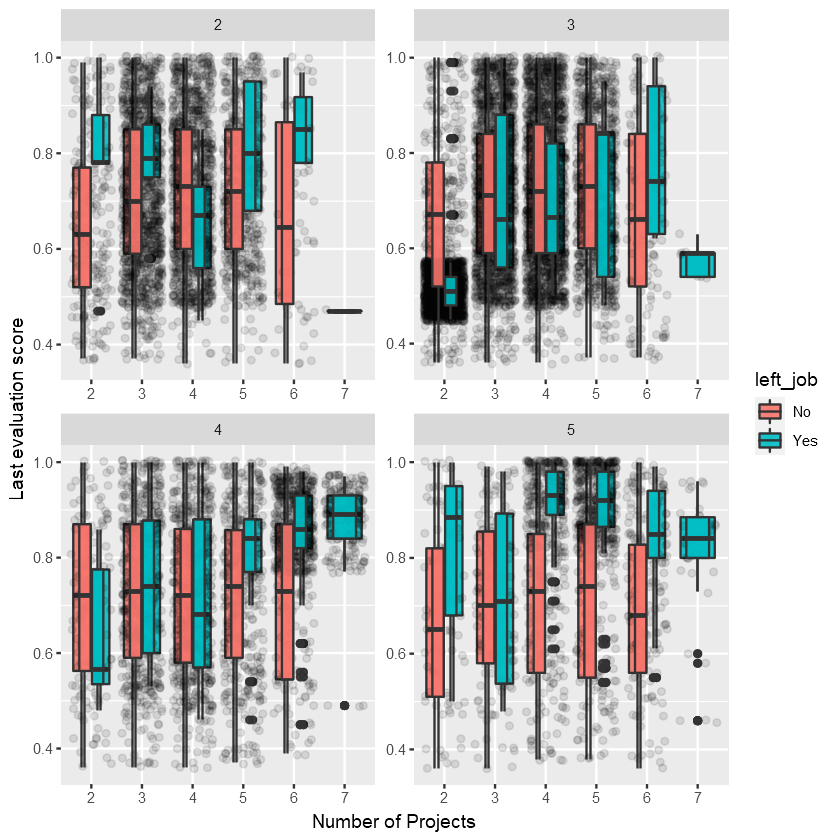

In [21]:
ggplot(HR_subset, aes(x = factor(number_project), y = last_evaluation, fill = left_job)) +
facet_wrap(~factor(time_spend_company), scales = "free")+
geom_boxplot(show.legend = FALSE) +
geom_jitter(alpha = 0.1) + geom_boxplot(width = .5) + labs(x = "Number of Projects", y = "Last evaluation score")

- First graph (2nd year), we can notice that employees are handling between 3 to 5 projects (largest group), their evaluation score is around 0.7.
- Second graph (3rd year), shows two interesting observations: the first one is we can notice a huge portion of employees handling 2 projects and they're getting low evaluation scores. This means they're not performing as what they company is expecting from them. Second observation is also we have a big portion of employees handling 3 to 5 projects. 
- We can notice in three of the plotted graphs that employees who are handling 7 projects end up leaving their job, even though we can observe them getting high evaluation scores in the 4 and 5th year. Hence, they are probably leaving because they cannot handle this workload and might be too much for them. We can say also the same thing about employees who are handling 6 projects, although a large portion of these employees decide to continue with the company.
- Another observation is that in the 4th and 5th graphs, employees who left the company (3 to 6 projects) are getting high evaluation scores but they still decided to leave. Salary could be a factor in this case.

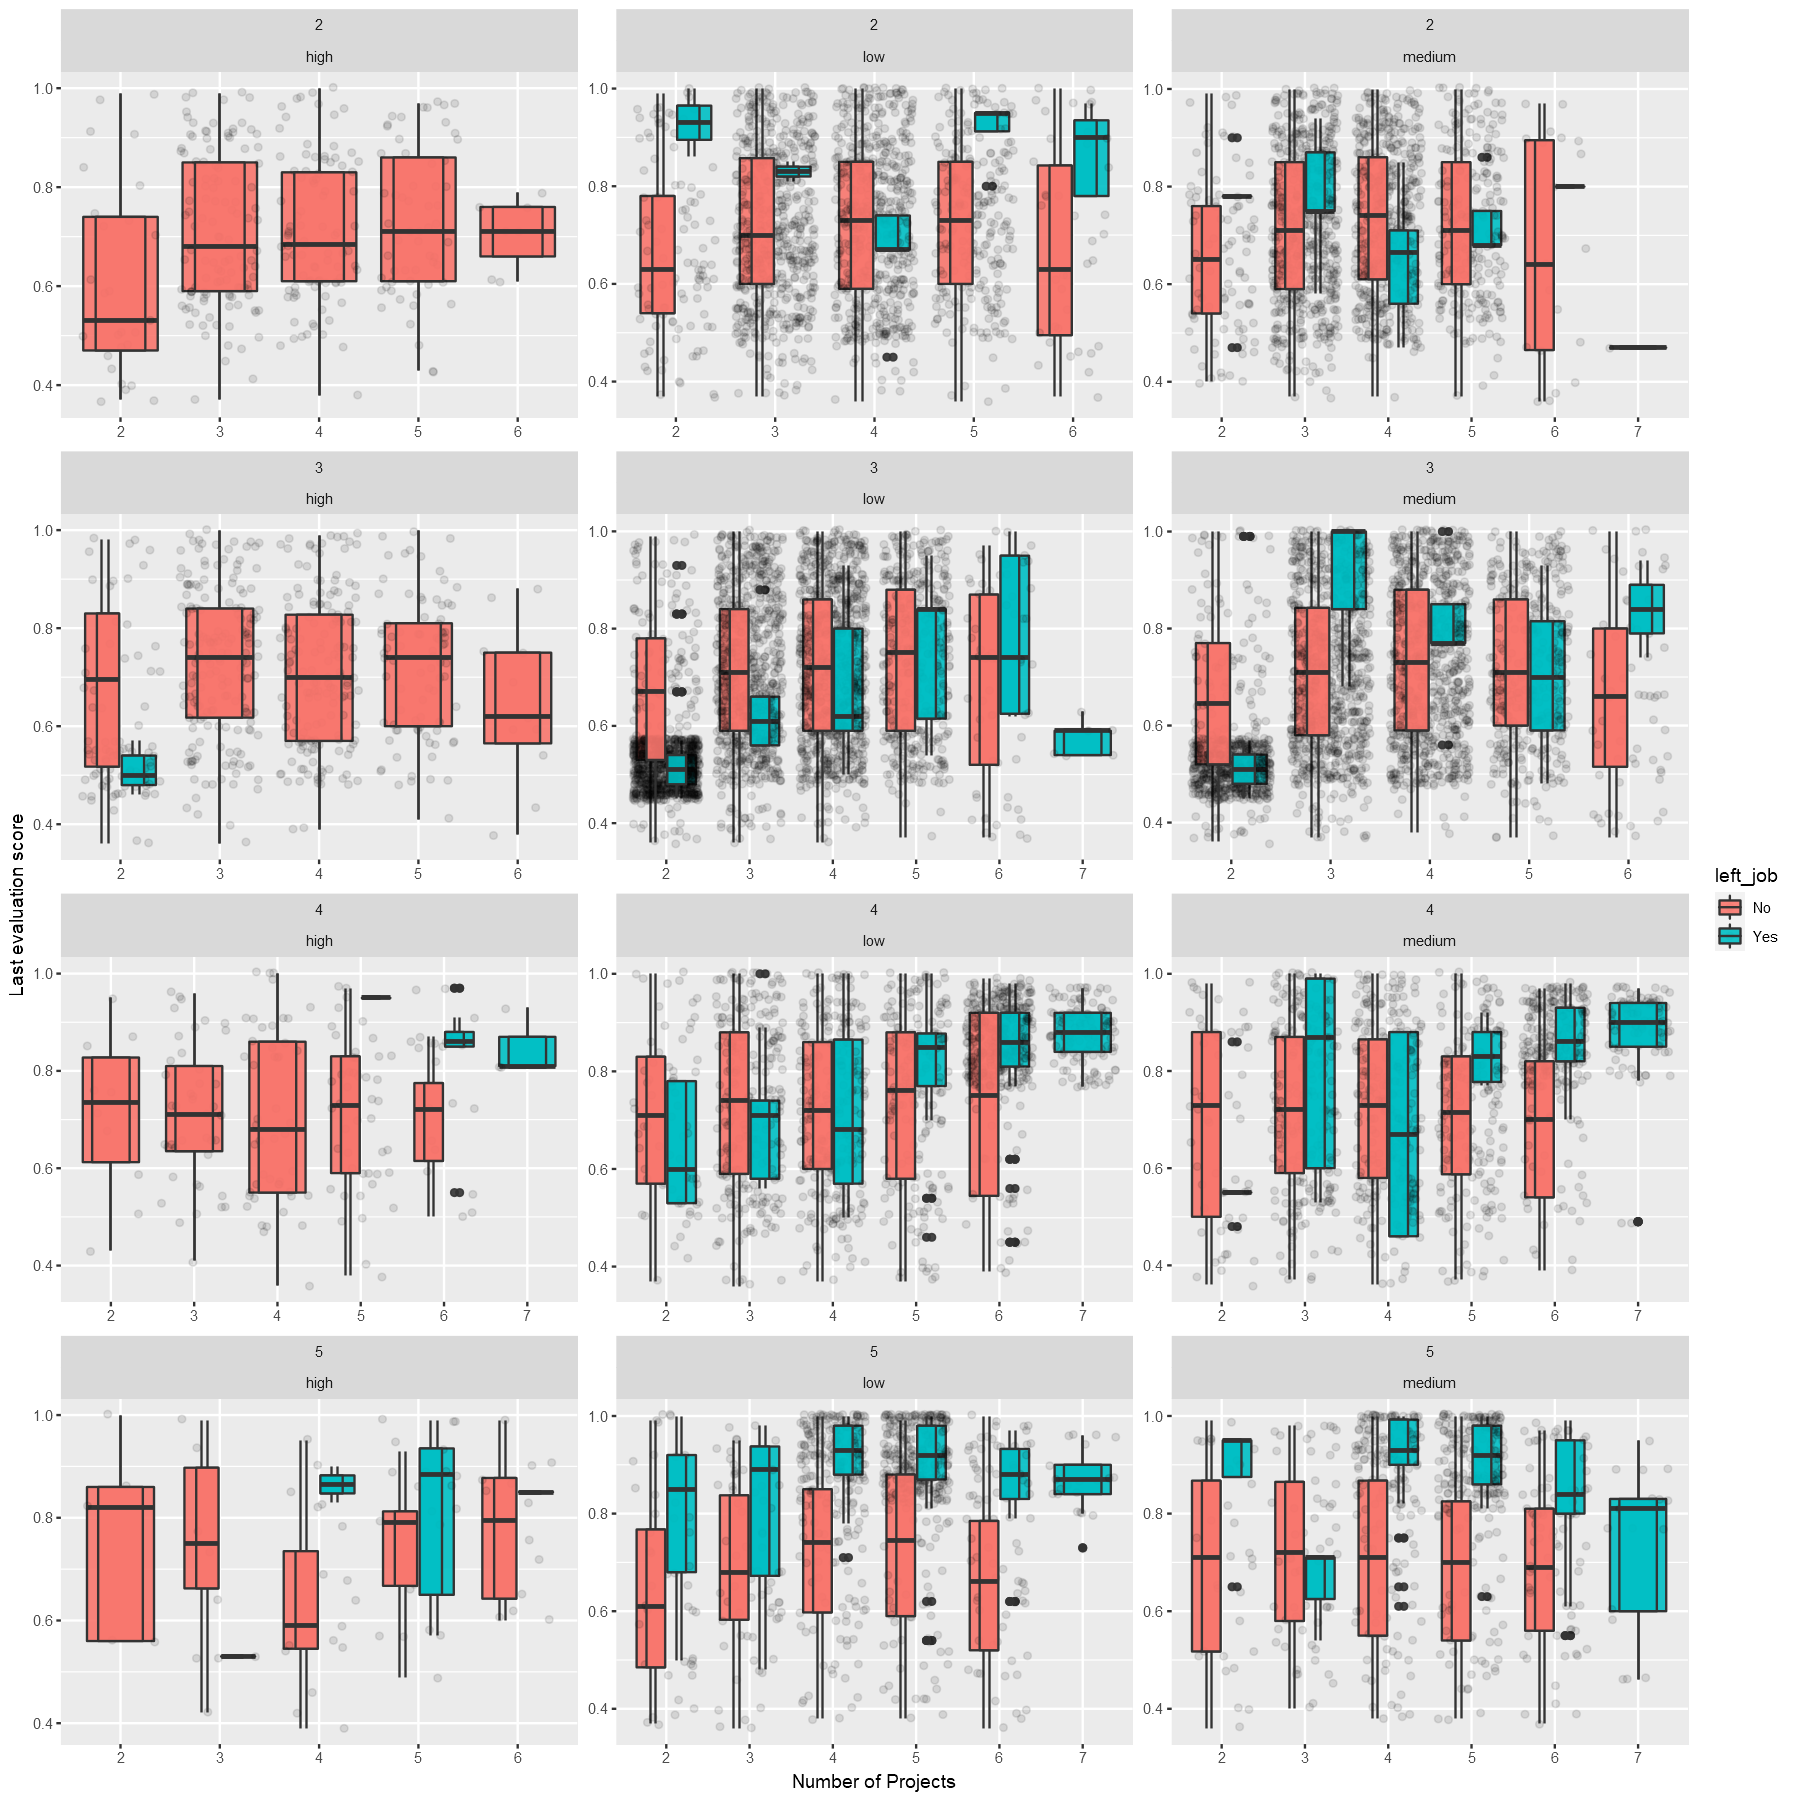

In [22]:
options(repr.plot.width = 15, repr.plot.height =15)
ggplot(HR_subset, aes(x = factor(number_project), y = last_evaluation, fill = left_job)) +
facet_wrap(~factor(time_spend_company) + salary, scales = "free", ncol = 3) +
geom_boxplot(show.legend = FALSE) +
geom_jitter(alpha = 0.1) + geom_boxplot(width = .5) + labs(x = "Number of Projects", y = "Last evaluation score")

- We can infer from this plot an interesting point, employees with high salaries mostly decide to continue with the company except for few cases in year 4 and 5, one reason might still be the heavy workload (5 & 6 projects). The other reason might simply be they decided to pursue a different opportunity in a different company.
- Another interesting observation is regarding medium and low salary employees who decided to leave: as the number of years increase employees the evaluation rate also increases. Meaning even though employees are getting high evaluation rates (year 4 and 5), they still decided to leave, probably because they feel they have been overworked but not getting enough compensation for their time and effort.
- So, what could be interesting to explore is to replace the last evaluation level with the satisfaction level, since we are noticing that the evaluation rate isn't something employees do consider when they decide to leave the company; at least during the 4th and 5th year.

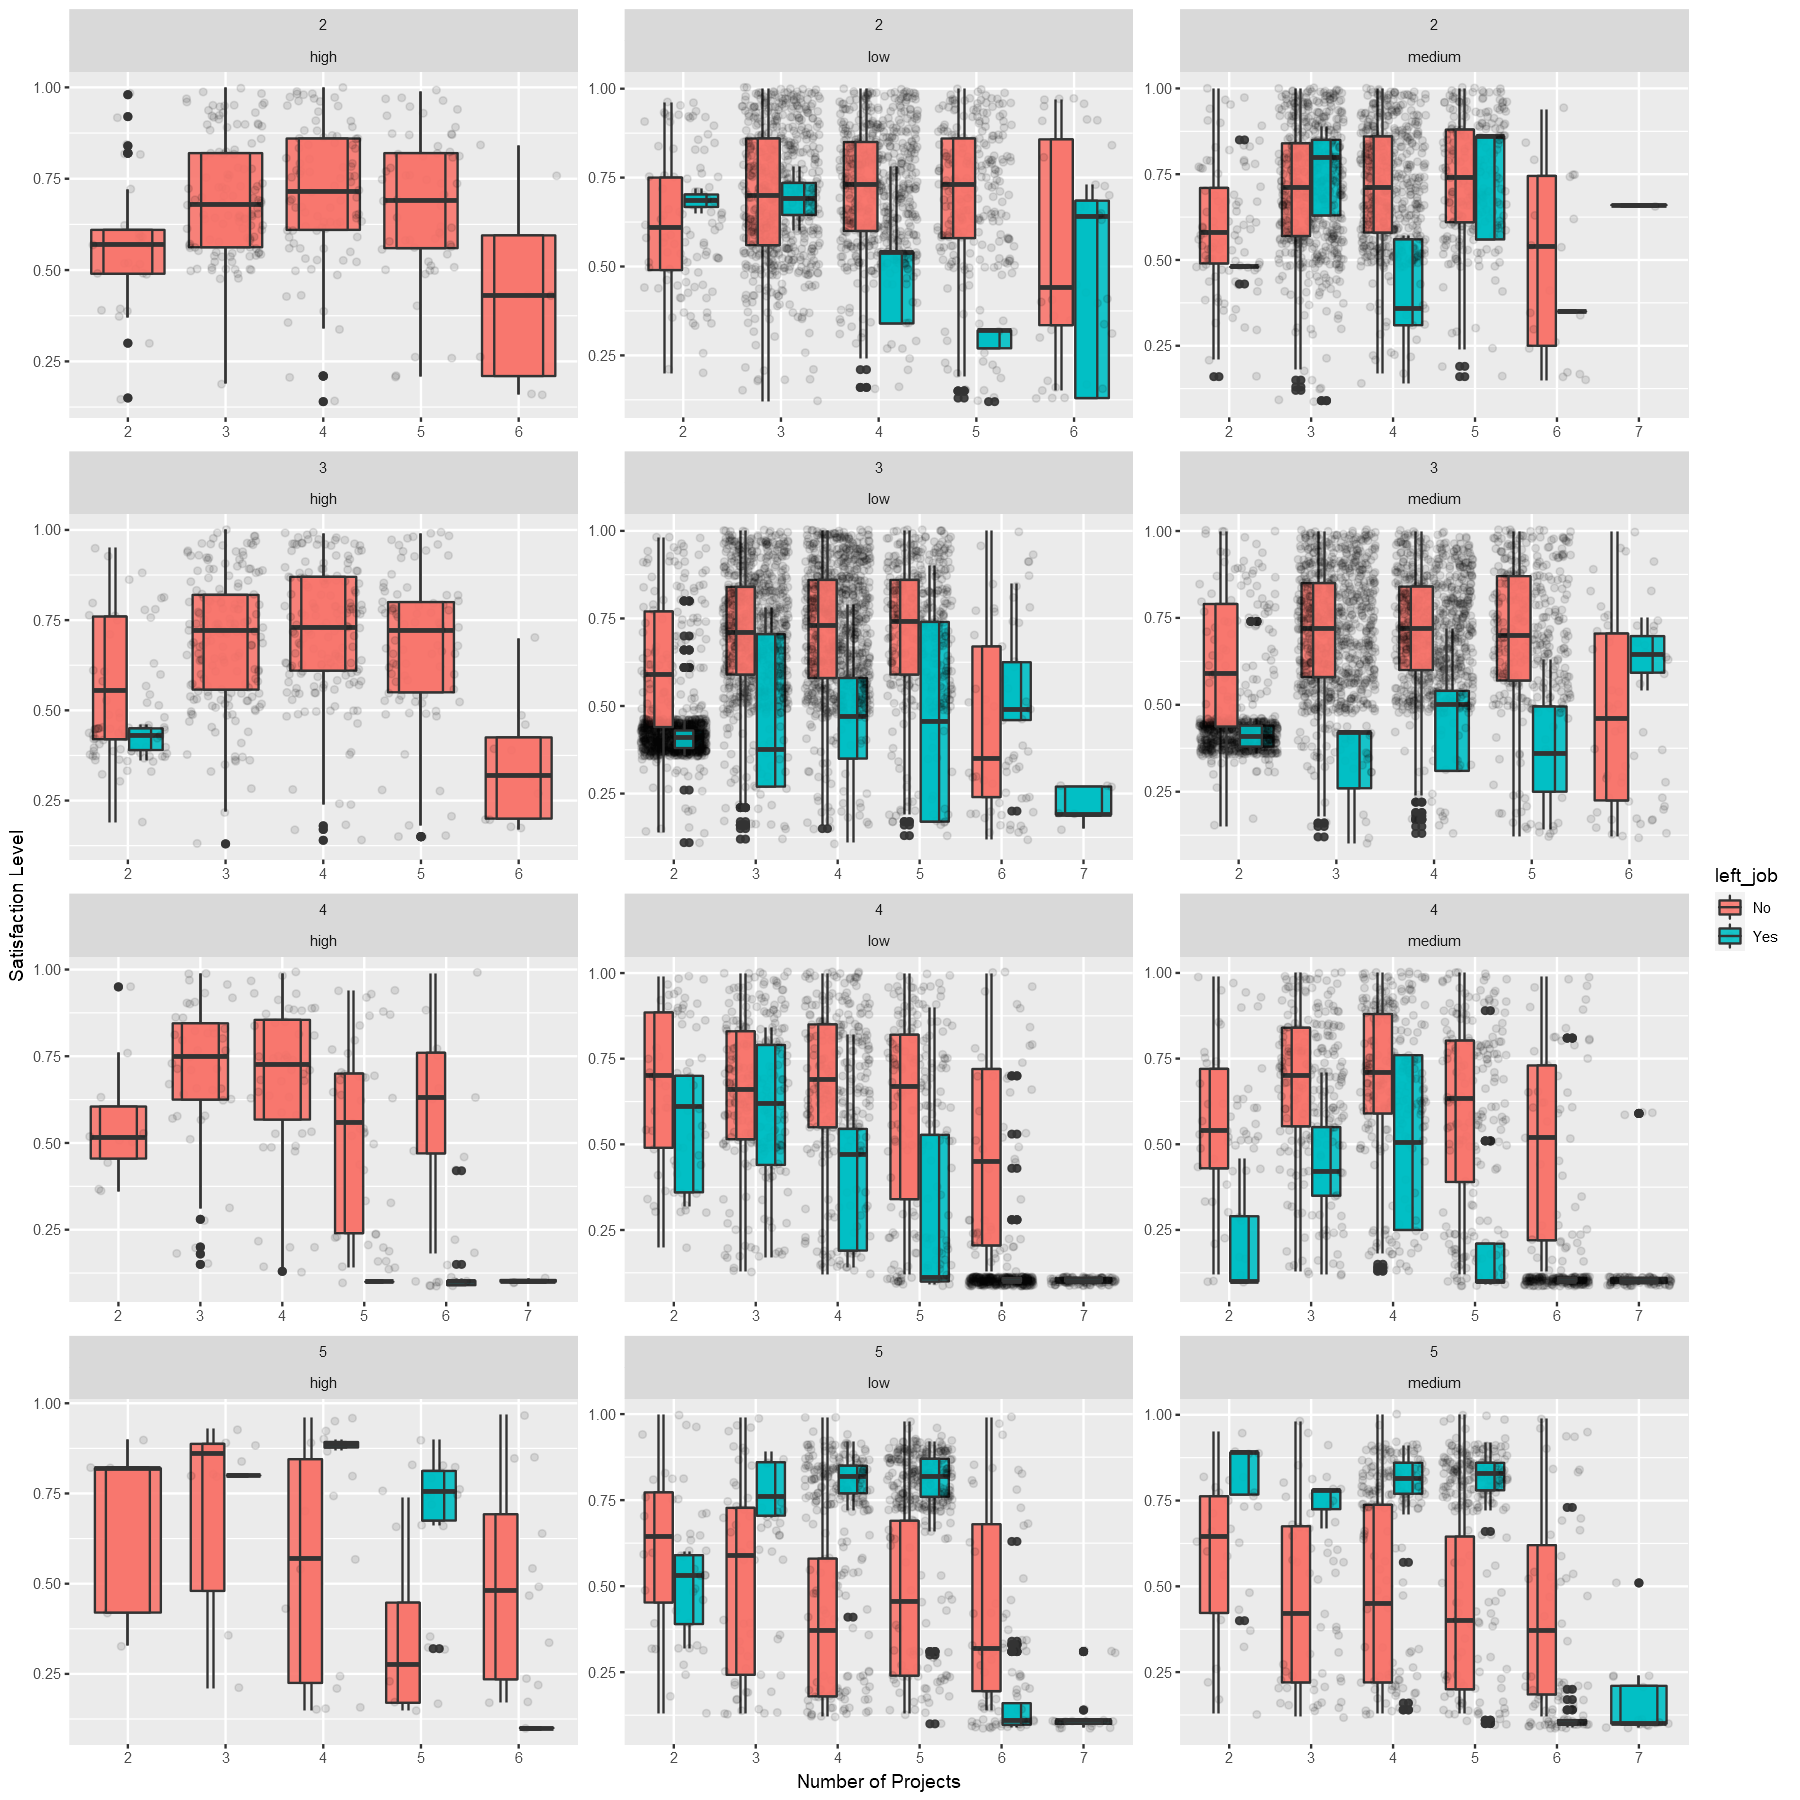

In [23]:
options(repr.plot.width = 15, repr.plot.height =15)
ggplot(HR_subset, aes(x = factor(number_project), y = satisfaction_level, fill = left_job)) +
facet_wrap(~factor(time_spend_company) + salary, scales = "free", ncol = 3) +
geom_boxplot(show.legend = FALSE) +
geom_jitter(alpha = 0.1) + geom_boxplot(width = .5) + labs(x = "Number of Projects", y = "Satisfaction Level")

- Seems like the steps we're taking are leading us to the correct path. We can observe that the satisfaction levels of medium and low salary employees tend to be average or even below the average when they have been overworked with projects. This is very noticeable in the 3rd and 4th year. 
- In the 5th year, we notice an interesting observation that goes hand in hand with the previous inference (high evaluation score), medium and low salary employees left the company even though their satisfaction levels were high, except for employees who have been assigned more than 5 projects. This could mean that they have found another job with a higher salary elsewhere.
- Because we know that there exists a correlation between satisfaction level, last evaluation, number of projects and time spent at the company; we can then ask the question whether there exists a significant satisfaction levels difference between the employees who decided to stay and the employees who decided to leave.
- Same question can be asked regarding the salary.

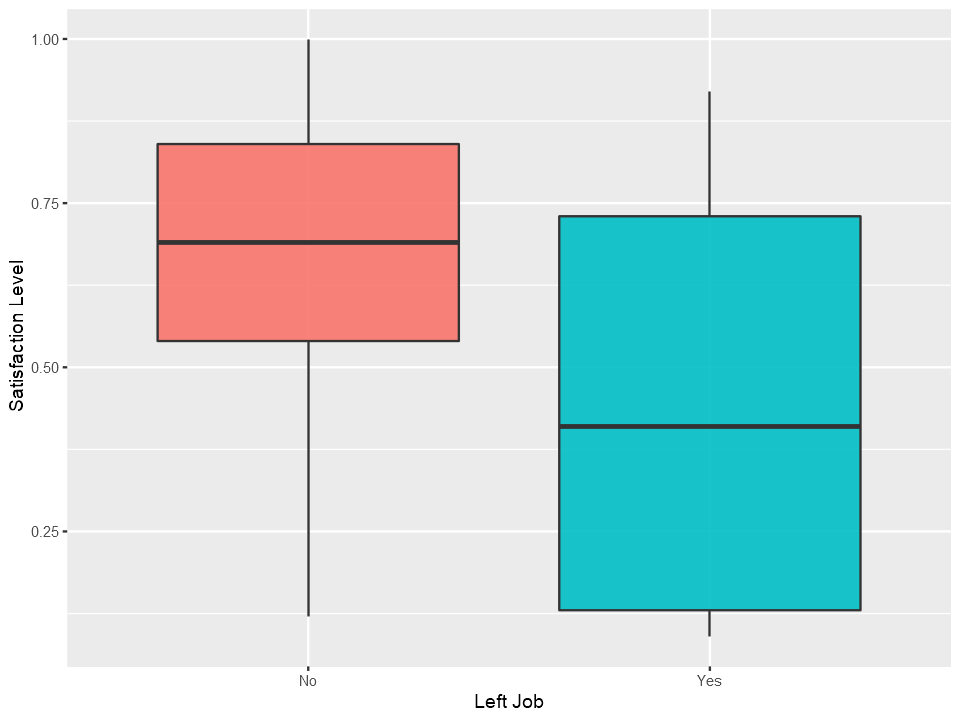

In [24]:
options(repr.plot.width = 8, repr.plot.height =6)
ggplot(HR_clean, aes(x = left_job, y = satisfaction_level, fill = left_job)) +
geom_boxplot(show.legend = FALSE) + labs(x = "Left Job", y = "Satisfaction Level")

Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"


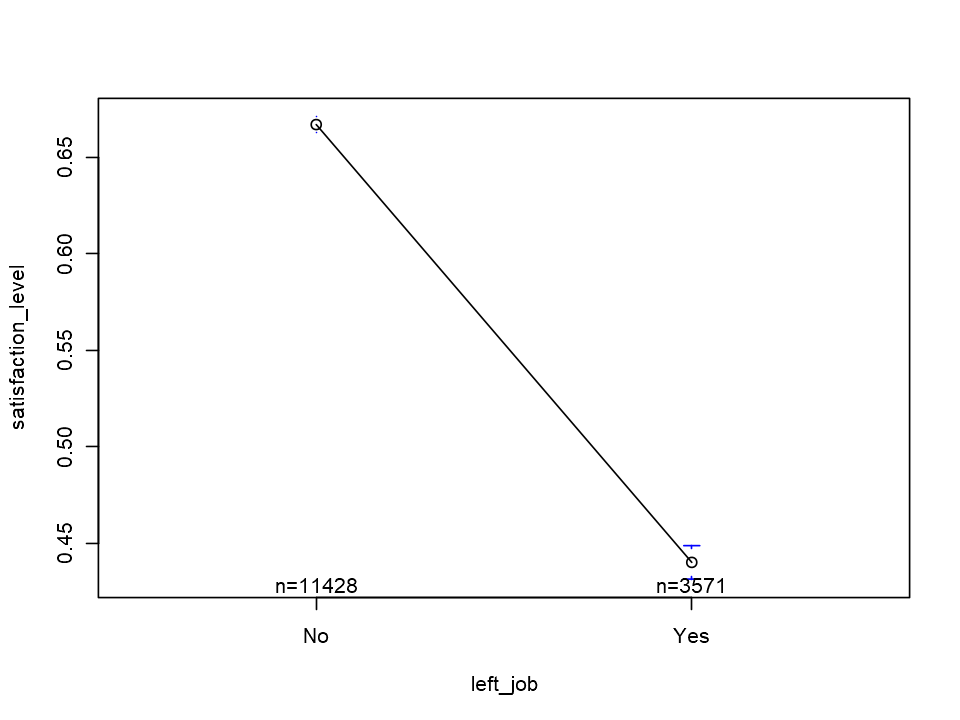

In [25]:
plotmeans(satisfaction_level~left_job, data=HR_clean)

In [26]:
t.test(satisfaction_level~left_job, alternative='two.sided', conf.level=.95, var.equal=FALSE, data=HR_clean)


	Welch Two Sample t-test

data:  satisfaction_level by left_job
t = 46.636, df = 5167, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 0.2171815 0.2362417
sample estimates:
 mean in group No mean in group Yes 
        0.6668096         0.4400980 


- There exists a significant satisfaction level difference between employees who stayed and employees who left  

In [27]:
chisq.test(HR_clean$salary, HR_clean$left_job)



	Pearson's Chi-squared test

data:  HR_clean$salary and HR_clean$left_job
X-squared = 381.23, df = 2, p-value < 2.2e-16


- There exists a significant salary difference between employees who stayed and employees who left  

## <span style="color: IndianRed;"> 2. Running Various Classification Models: </span>

### <span style="color: LightSalmon;"> *2.1 Split the data into train and test sets:* </span>

In [28]:
set.seed(123)
split.train.test <- createDataPartition(HR_clean$left_job,p=0.7,list=FALSE)
dtrain <- HR_clean[split.train.test,]
dtest <- HR_clean[-split.train.test,]

- As we said earlier, our dataset is moderately imbalanced, therefore we would need to apply a resampling method in order to adjust the number of majority and minority instances we have. One method we're going to use is up sampling, meaning we're going to inject into the dataset synthetically generated data points that correspond to the minority class. 
- However, we need to be aware that this might cause overfitting if applied incorrectly. Since we're going to use 10-fold cross validation, we need to apply the resampling method on the training set only, while we're training the model.

### <span style="color: LightSalmon;"> *2.2 Logistic Regression Model:* </span>

In [29]:
ctrl <- trainControl(method = "cv", number = 10, savePredictions = TRUE, classProbs = TRUE, sampling = "up")
lr.fit <- train(
   left_job ~ .,
   data = dtrain,
   method = "glm",
   family = binomial(link = 'logit'),
   trControl = ctrl
 )
 lr.fit

Generalized Linear Model 

10500 samples
    9 predictor
    2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9450, 9450, 9450, 9450, 9450, 9450, ... 
Addtional sampling using up-sampling

Resampling results:

  Accuracy   Kappa    
  0.7587619  0.4513098


Inferences from the given output:
- Model Accuracy is around: 75.9%

In [30]:
summary(lr.fit)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1579  -0.8098   0.1137   0.8587   2.8539  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.0707810  0.1510772  -7.088 1.36e-12 ***
satisfaction_level       -4.3712884  0.0886838 -49.291  < 2e-16 ***
last_evaluation           1.2482484  0.1432372   8.715  < 2e-16 ***
number_project           -0.4178242  0.0201425 -20.743  < 2e-16 ***
average_monthly_hours     0.0050684  0.0005027  10.082  < 2e-16 ***
time_spend_company        0.4766529  0.0168188  28.340  < 2e-16 ***
work_accidentYes         -1.4772238  0.0696945 -21.196  < 2e-16 ***
promotion_last_5yearsYes -1.9352140  0.2266897  -8.537  < 2e-16 ***
depthr                    0.2281531  0.1146500   1.990 0.046591 *  
deptIT                   -0.1284001  0.1070141  -1.200 0.230200    
deptmanagement           -0.6668589  0.1357815  -4.911 9.05e-07 ***
deptmarketing            -0.1088763  0.1153

- The deviance residuals look good since they are close to being centered on 0 and symmetric as well.
- The coefficient that seem to have the biggest negative impact on the left_job variable is satisfaction_level, which is understandable since if the employee is dissatisfied then they would leave their job at some point. 
- On the other hand the coefficient that seem to have the highest positive impact on the dependent variable is last_evaluation. Meaning the higher the evaluation the more likely that this person won't end up leaving his/her job. Which is again very reasonable.

- To make sure it doesn’t overfit the data, let’s look at the accuracy on the test set.

In [31]:
#Building the confusion Matrix to measure the test accuracy of our model:
lr.pred <- predict(lr.fit, dtest)
cfm.lr <- confusionMatrix(lr.pred, dtest$left_job, positive = "Yes")
cfm.lr

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  2553  192
       Yes  875  879
                                          
               Accuracy : 0.7628          
                 95% CI : (0.7501, 0.7752)
    No Information Rate : 0.7619          
    P-Value [Acc > NIR] : 0.4524          
                                          
                  Kappa : 0.4638          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8207          
            Specificity : 0.7447          
         Pos Pred Value : 0.5011          
         Neg Pred Value : 0.9301          
             Prevalence : 0.2381          
         Detection Rate : 0.1954          
   Detection Prevalence : 0.3899          
      Balanced Accuracy : 0.7827          
                                          
       'Positive' Class : Yes             
                        

Inferences from the above confusion matrix:
- Model Accuracy is around: 76.3%
- Sensitivity and specificity scores are good.

- By comparing the trained logistic regression model accuracy with the confusion matrix accuracy using the test set, we can notice that they're almost the same.
- We're going to see whether this model gives us the best accuracy or not.

In [32]:
 #Storing the test accuracy of the logistic regression model
 lr.accuracy <- 76.3

### <span style="color: LightSalmon;"> *2.3 Linear Discriminant Analysis Model:* </span>

In [33]:
ctrl <- trainControl(method = "cv", number = 10, savePredictions = TRUE, classProbs = TRUE, sampling = "up")
lda.fit <- train(
   left_job ~ .,
   data = dtrain,
   method = "lda",
   trControl = ctrl
 )
 lda.fit

Linear Discriminant Analysis 

10500 samples
    9 predictor
    2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9450, 9450, 9450, 9450, 9450, 9450, ... 
Addtional sampling using up-sampling

Resampling results:

  Accuracy   Kappa    
  0.7497143  0.4349043


Inferences from the given output:
- Model Accuracy is around: 75%

- To make sure it doesn’t overfit the data, let’s look at the accuracy on the test set.

In [34]:
lda.fit$finalModel

Call:
lda(x, y)

Prior probabilities of groups:
 No Yes 
0.5 0.5 

Group means:
    satisfaction_level last_evaluation number_project average_monthly_hours
No           0.6653463       0.7147237       3.781875              198.9206
Yes          0.4413800       0.7196537       3.875375              207.1124
    time_spend_company work_accidentYes promotion_last_5yearsYes depthr
No            3.386125         0.178500                 0.027125 0.0465
Yes           3.881750         0.054625                 0.004625 0.0635
      deptIT deptmanagement deptmarketing deptproduct_mng deptRandD deptsales
No  0.079750       0.048750       0.06000        0.063000  0.058625  0.268125
Yes 0.078875       0.023125       0.05325        0.055875  0.033000  0.285875
    deptsupport depttechnical salarylow salarymedium
No     0.146875      0.177375   0.44425      0.45325
Yes    0.154625      0.198000   0.59625      0.38150

Coefficients of linear discriminants:
                                  LD1
satisf

- Looking at the final / optimal lda model, we notice that the number of employees who stayed vs the number of employees who left is the same, since we've applied upsampling to our training set.

In [35]:
lda.pred <- predict(lda.fit, dtest)
cfm.lda <- confusionMatrix(lda.pred, dtest$left_job, positive = "Yes")
cfm.lda

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  2526  209
       Yes  902  862
                                          
               Accuracy : 0.7531          
                 95% CI : (0.7402, 0.7656)
    No Information Rate : 0.7619          
    P-Value [Acc > NIR] : 0.9214          
                                          
                  Kappa : 0.4431          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8049          
            Specificity : 0.7369          
         Pos Pred Value : 0.4887          
         Neg Pred Value : 0.9236          
             Prevalence : 0.2381          
         Detection Rate : 0.1916          
   Detection Prevalence : 0.3921          
      Balanced Accuracy : 0.7709          
                                          
       'Positive' Class : Yes             
                        

Inferences from the above confusion matrix:
- Model Accuracy is around: 75.3%
- Sensitivity and specificity are again to be considered as good scores

- By observing the given outputs, we notice that the trained lda model accuracy and the test accuracy are quiet similar

In [36]:
#Storing the test accuracy of the LDA model
lda.accuracy <- 75.3

### <span style="color: LightSalmon;"> *2.4 Classification Tree Model:* </span>

#### <span style="color: LightYellow;"> *2.4.1 Building The Full Tree:* </span>

- We won't be using the caret cross-validation tool as the rpart model already uses 10-fold cross-validation.
- However, we will be applying 'prior probabilities', which is an indirect way of adjusting the importance of missclassifications for each class. 

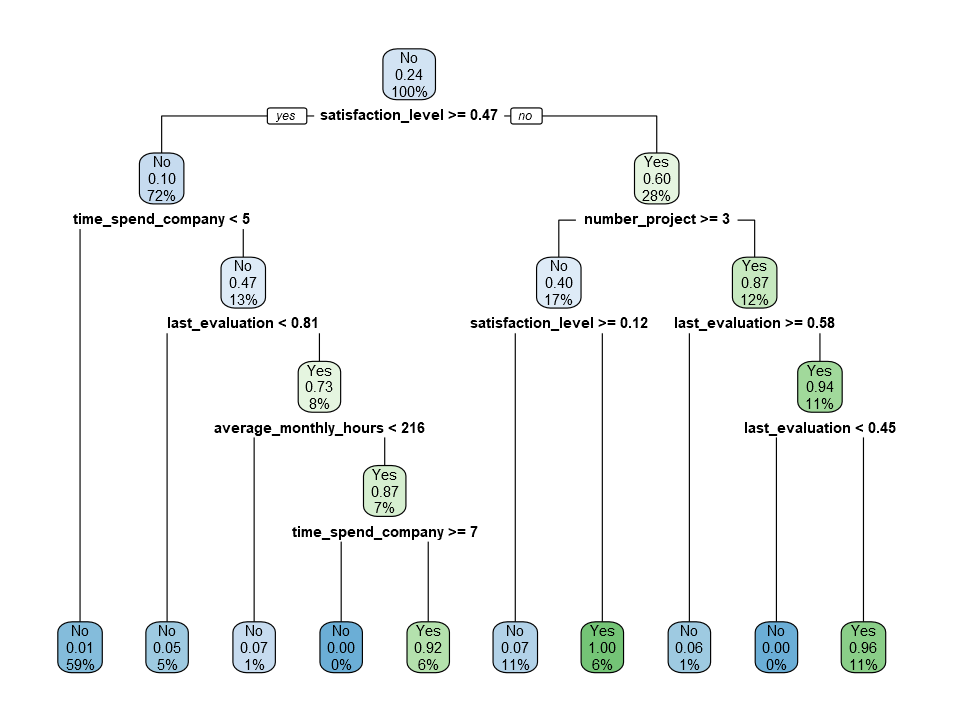

In [37]:
hr.tree = rpart(left_job~., data = dtrain, method = 'class', parms=list(prior=c(.762,.238)))
rpart.plot(hr.tree)

In [38]:
tree.pred <- predict(hr.tree, dtrain, type = 'class')
cfm.tree <- confusionMatrix(as.factor(tree.pred), as.factor(dtrain$left_job), positive = "Yes")
cfm.tree

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  7903  206
       Yes   97 2294
                                          
               Accuracy : 0.9711          
                 95% CI : (0.9678, 0.9743)
    No Information Rate : 0.7619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9193          
                                          
 Mcnemar's Test P-Value : 5.489e-10       
                                          
            Sensitivity : 0.9176          
            Specificity : 0.9879          
         Pos Pred Value : 0.9594          
         Neg Pred Value : 0.9746          
             Prevalence : 0.2381          
         Detection Rate : 0.2185          
   Detection Prevalence : 0.2277          
      Balanced Accuracy : 0.9527          
                                          
       'Positive' Class : Yes             
                        

In [39]:
tree.pred <- predict(hr.tree, dtest, type = 'class')
cfm.tree <- confusionMatrix(as.factor(tree.pred), as.factor(dtest$left_job), positive = "Yes")
cfm.tree

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3395   93
       Yes   33  978
                                          
               Accuracy : 0.972           
                 95% CI : (0.9667, 0.9766)
    No Information Rate : 0.7619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9213          
                                          
 Mcnemar's Test P-Value : 1.471e-07       
                                          
            Sensitivity : 0.9132          
            Specificity : 0.9904          
         Pos Pred Value : 0.9674          
         Neg Pred Value : 0.9733          
             Prevalence : 0.2381          
         Detection Rate : 0.2174          
   Detection Prevalence : 0.2247          
      Balanced Accuracy : 0.9518          
                                          
       'Positive' Class : Yes             
                        

Inferences from the above confusion matrix:
- Model Accuracy is around 97.2%
- The sensitivity and specificity scores are very good

Next step is pruning the tree to see if it will improve our model's accuracy

#### <span style="color: LightYellow;"> *2.4.2 Pruning The Tree:* </span>

In [40]:
printcp(hr.tree)


Classification tree:
rpart(formula = left_job ~ ., data = dtrain, method = "class", 
    parms = list(prior = c(0.762, 0.238)))

Variables actually used in tree construction:
[1] average_monthly_hours last_evaluation       number_project       
[4] satisfaction_level    time_spend_company   

Root node error: 2499/10500 = 0.238

n= 10500 

        CP nsplit rel error  xerror      xstd
1 0.228149      0   1.00000 1.00000 0.0174574
2 0.192509      1   0.77185 0.77185 0.0158777
3 0.078376      3   0.38683 0.38683 0.0118531
4 0.049628      5   0.23008 0.23008 0.0093286
5 0.032018      6   0.18045 0.18165 0.0083390
6 0.016008      7   0.14843 0.15164 0.0076471
7 0.011206      8   0.13243 0.13643 0.0072670
8 0.010000      9   0.12122 0.12882 0.0070681


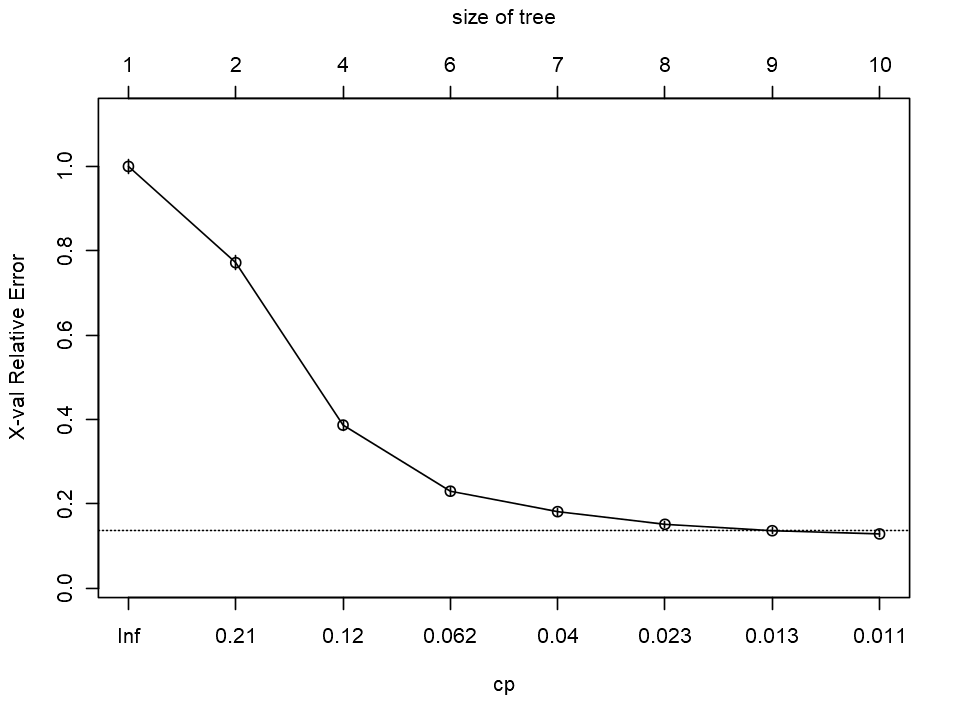

In [41]:
plotcp(hr.tree)

In [42]:
bestcp <- hr.tree$cptable[which.min(hr.tree$cptable[,"xerror"]),"CP"]
bestcp

[1] 0.01

##### <span style="color: White;"> *2.4.2.1 Postpruning:* </span>

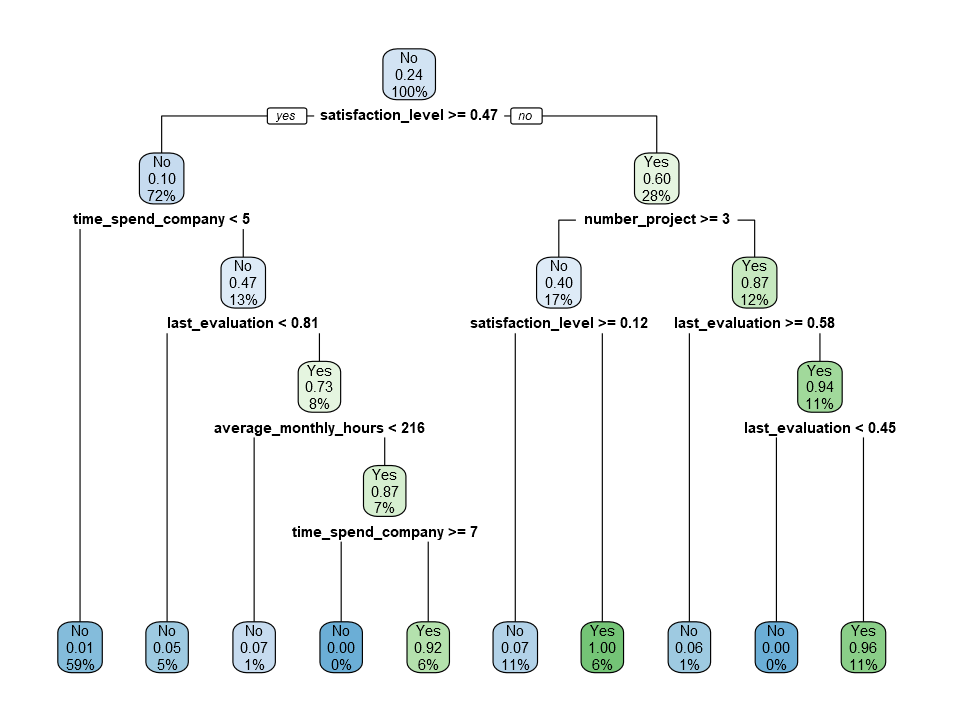

In [43]:
hr.tree.prun = prune(hr.tree, cp = bestcp)
rpart.plot(hr.tree.prun)

It seems like the minimum cp doesn't result in the tree being pruned. Hence, according to the 1-SE rule (Selecting the smallest tree that has a misclassification rate below the horizontal reference line), we're going to select 0.013 as our cp.

In [44]:
hr.tree.postprun <- prune(hr.tree, cp = 0.013)

Compute the test accuracy of the pruned tree using the postproning approach:

In [45]:
post.tree.pred <- predict(hr.tree.postprun, dtest, type = 'class')
cfm.post.tree <- confusionMatrix(as.factor(post.tree.pred), as.factor(dtest$left_job), positive = "Yes")
cfm.post.tree

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3385   93
       Yes   43  978
                                          
               Accuracy : 0.9698          
                 95% CI : (0.9643, 0.9746)
    No Information Rate : 0.7619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9153          
                                          
 Mcnemar's Test P-Value : 2.649e-05       
                                          
            Sensitivity : 0.9132          
            Specificity : 0.9875          
         Pos Pred Value : 0.9579          
         Neg Pred Value : 0.9733          
             Prevalence : 0.2381          
         Detection Rate : 0.2174          
   Detection Prevalence : 0.2269          
      Balanced Accuracy : 0.9503          
                                          
       'Positive' Class : Yes             
                        

We notice that we get the slightly less accuracy than the original tree, however we end up pruning it slightly as well.

##### <span style="color: White;"> *2.4.2.2 Pre-pruning:* </span>

In [46]:
hr.tree.preprun <- rpart(left_job ~ ., data = dtrain, method = "class", 
                   control = rpart.control(cp = 0.014, maxdepth = 10, minsplit = 10, prior = list(0.762,0.238)))

Compute the test accuracy of the pruned tree using pre-pruning approach:

In [47]:
pre.tree.pred <- predict(hr.tree.preprun, dtest, type = 'class')
cfm.pre.tree <- confusionMatrix(as.factor(pre.tree.pred), as.factor(dtest$left_job), positive = "Yes")
cfm.pre.tree

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3385   93
       Yes   43  978
                                          
               Accuracy : 0.9698          
                 95% CI : (0.9643, 0.9746)
    No Information Rate : 0.7619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9153          
                                          
 Mcnemar's Test P-Value : 2.649e-05       
                                          
            Sensitivity : 0.9132          
            Specificity : 0.9875          
         Pos Pred Value : 0.9579          
         Neg Pred Value : 0.9733          
             Prevalence : 0.2381          
         Detection Rate : 0.2174          
   Detection Prevalence : 0.2269          
      Balanced Accuracy : 0.9503          
                                          
       'Positive' Class : Yes             
                        

We again notice that we get the slightly less accuracy than the original tree, But same accuracy as post-pruning.

#### <span style="color: LightYellow;"> *2.4.3 Plotting The Original Tree, The pruned Trees Using Both Postpruning & Pre-pruning Approaches:* </span>

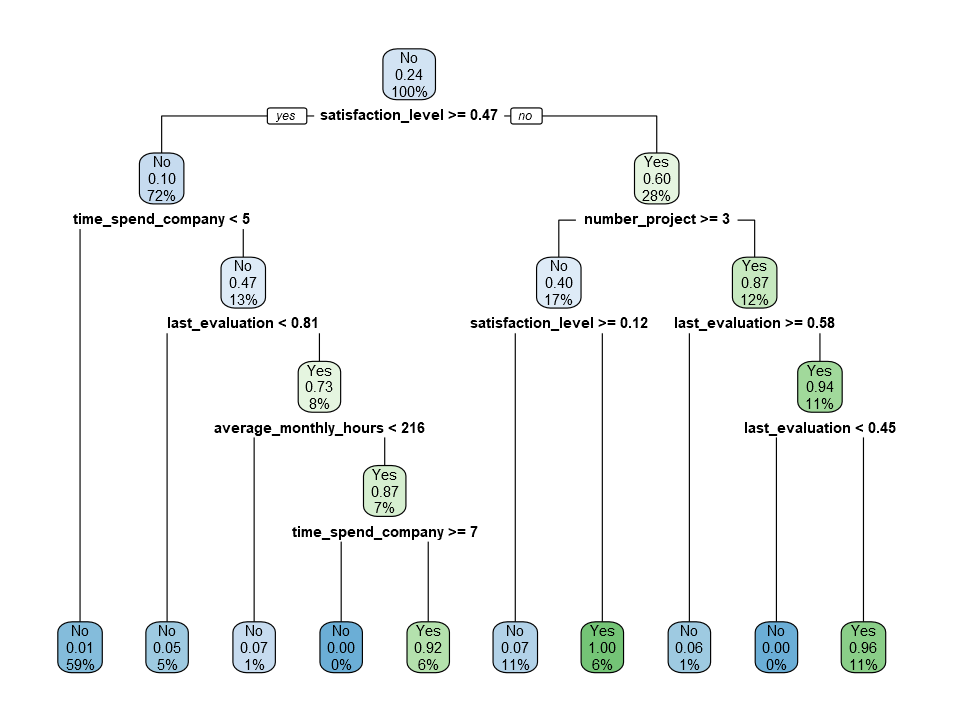

In [48]:
rpart.plot(hr.tree)

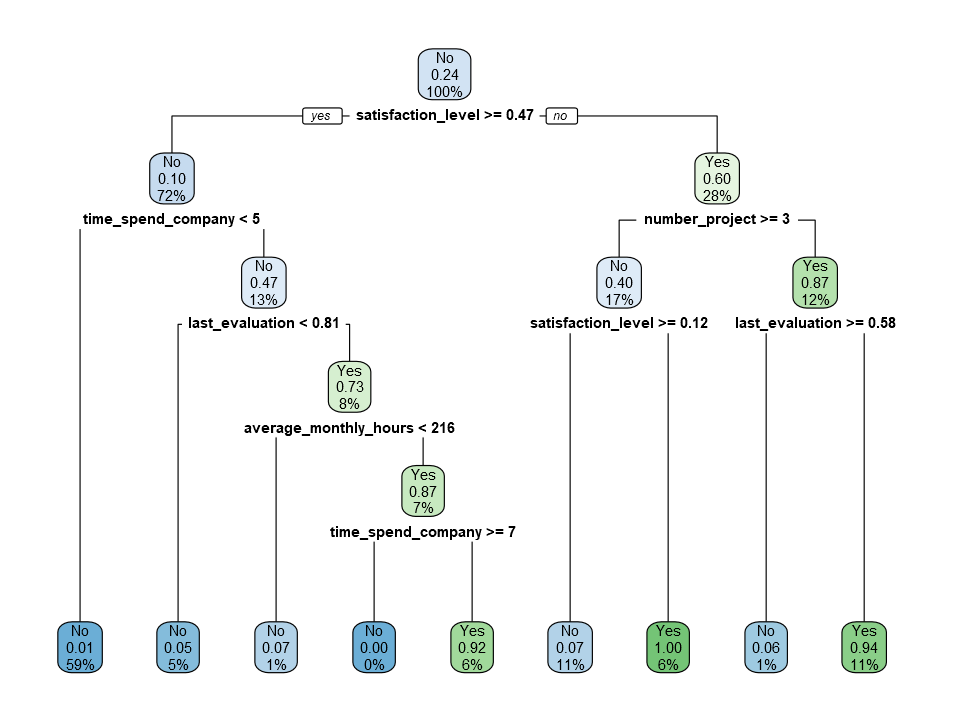

In [49]:
rpart.plot(hr.tree.postprun)

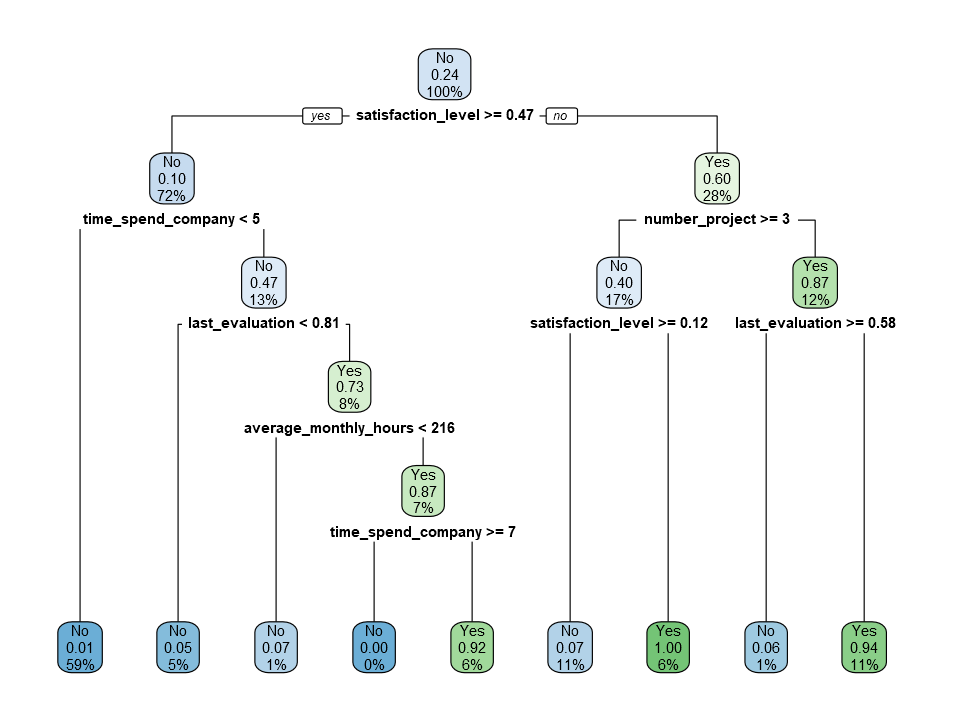

In [50]:
rpart.plot(hr.tree.preprun)

Setting levels: control = No, case = Yes

Setting direction: controls > cases




Call:
roc.default(response = dtest$left_job, predictor = tree.preds.roc)

Data: tree.preds.roc in 3428 controls (dtest$left_job No) > 1071 cases (dtest$left_job Yes).
Area under the curve: 0.9717


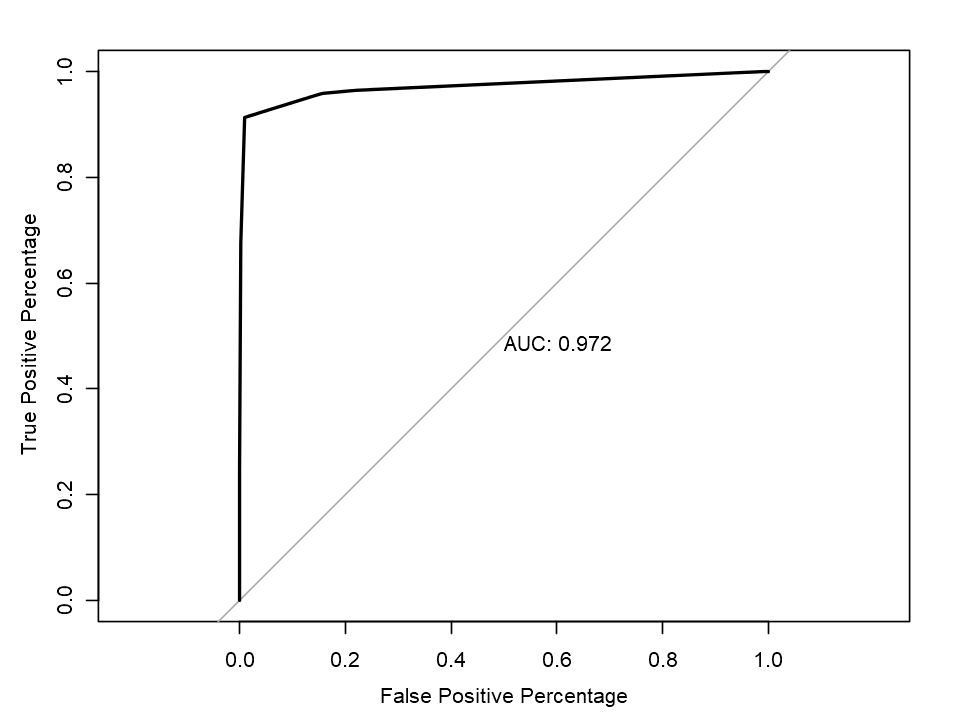

In [51]:
tree.preds.roc<- predict(hr.tree, dtest, type="prob")[,1]
tree.roc <- roc(dtest$left_job, tree.preds.roc)
print(tree.roc)
plot(tree.roc, legacy.axes = TRUE,percent = TRUE, print.auc = TRUE, xlab = "False Positive Percentage", ylab = "True Positive Percentage")

- We can notice that the ROC curve is closer to the top-left corner, which is indicate a very good performance. A confirmation to our observation is the AUC score, which is a good measure of the predictive accuracy of the model. In our case, the score is around 0.97, which is very good

In [52]:
#Storing the test accuracy of the classification tree model
tree.accuracy <- 97.2

### <span style="color: LightSalmon;"> *2.5 Random Forest Model:* </span>

In [53]:
ctrl <- trainControl(method = "cv", number = 10, savePredictions = TRUE, classProbs = TRUE, sampling = "up")
rf.HR <- train(
   left_job ~ .,
   data = dtrain,
   method = "rf",
   ntree = 100,
   trControl = ctrl
 )
 rf.HR

Random Forest 

10500 samples
    9 predictor
    2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9450, 9450, 9450, 9450, 9450, 9450, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9756190  0.9321057
  10    0.9898095  0.9715790
  18    0.9854286  0.9596763

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.

- the algorithm looks for the best feature among a random subset of features in our case it's 10.
- The accuracy of the model is around 99%.

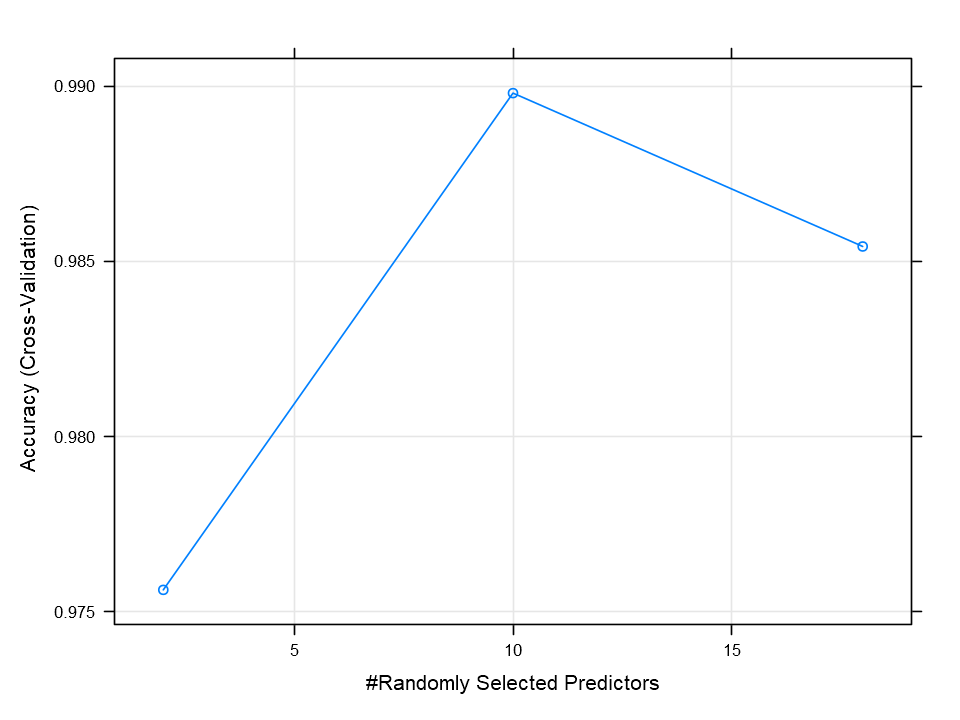

In [54]:
plot(rf.HR)

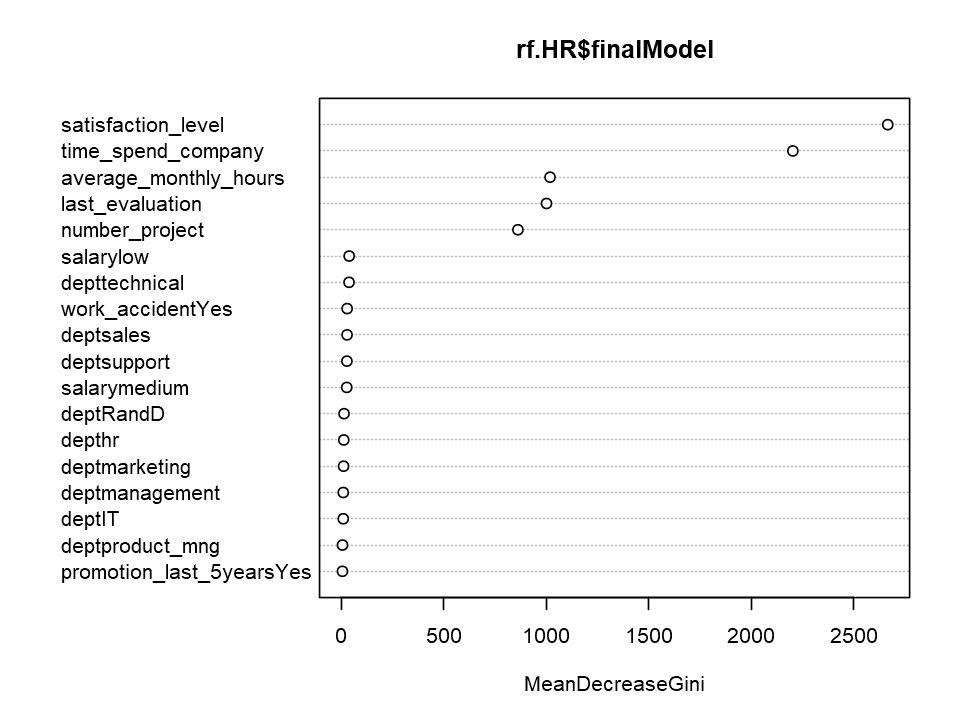

In [55]:
varImpPlot(rf.HR$finalModel)

- Looking at the Mean Decrease Gini plot, It seems that the main important features are: time spent in the company, average monthly hours and last evaluation, number of projects and the most important of them all is satisfaction level.

- Now let's create a confusion matrix to check the test accuracy of our model

In [56]:
rf.pred <- predict(rf.HR,dtest[,-7])
cfm.rf <- confusionMatrix(as.factor(rf.pred), as.factor(dtest$left_job))
cfm.rf

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  3421   38
       Yes    7 1033
                                          
               Accuracy : 0.99            
                 95% CI : (0.9866, 0.9927)
    No Information Rate : 0.7619          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9722          
                                          
 Mcnemar's Test P-Value : 7.744e-06       
                                          
            Sensitivity : 0.9980          
            Specificity : 0.9645          
         Pos Pred Value : 0.9890          
         Neg Pred Value : 0.9933          
             Prevalence : 0.7619          
         Detection Rate : 0.7604          
   Detection Prevalence : 0.7688          
      Balanced Accuracy : 0.9812          
                                          
       'Positive' Class : No              
                        

Inferences from the above confusion matrix:
- Model Accuracy is around 99%
- Sensitivity and specificity are almost perfect

Setting levels: control = No, case = Yes

Setting direction: controls > cases




Call:
roc.default(response = dtest$left_job, predictor = rf.pred.roc)

Data: rf.pred.roc in 3428 controls (dtest$left_job No) > 1071 cases (dtest$left_job Yes).
Area under the curve: 0.9942


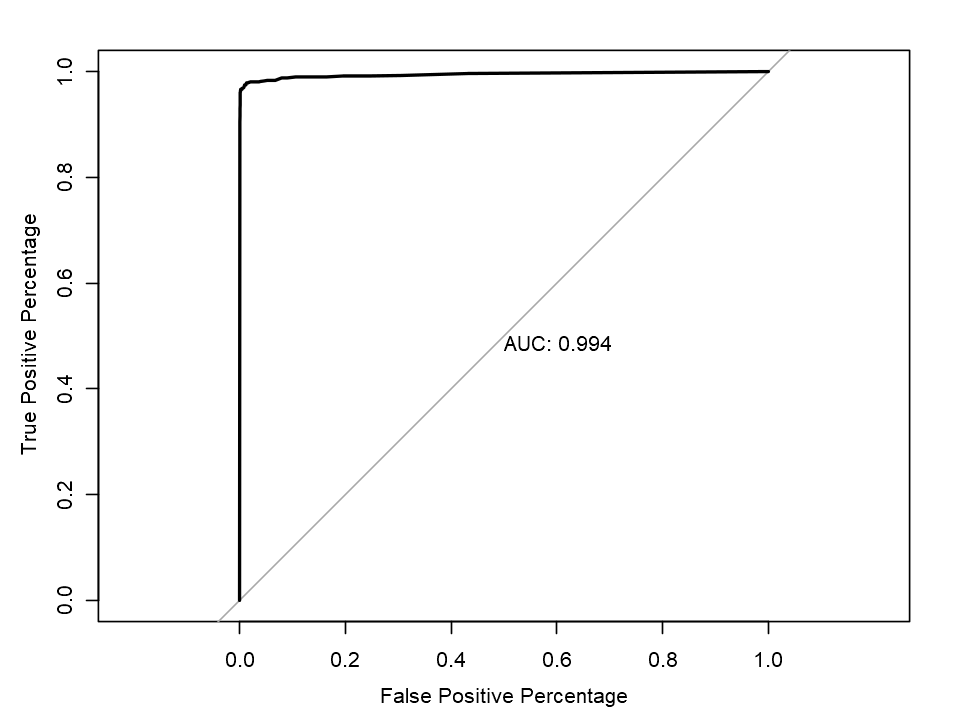

In [57]:
rf.pred.roc <- predict(rf.HR, dtest, type="prob")[,1]
rf.roc <- roc(dtest$left_job, rf.pred.roc)
print(rf.roc)
plot(rf.roc, legacy.axes = TRUE,percent = TRUE, print.auc = TRUE, xlab = "False Positive Percentage", ylab = "True Positive Percentage")

- We can again notice that the ROC curve is closer to the top-left corner. the score is around 0.99, which is even better than the score we got when we ran the classification tree model.

In [58]:
#Storing the training and test accuracy of the RF model
rf.accuracy <- 99

## <span style="color: IndianRed;"> 3. Model Evaluation: </span>

- Let's visualize the models where we have used the caret cross-validation tool to measure their accuarcy.

In [59]:
results <- resamples(list(LR=lr.fit, LDA=lda.fit, RF = rf.HR))
summary(results)


Call:
summary.resamples(object = results)

Models: LR, LDA, RF 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.7419048 0.7540476 0.7600000 0.7587619 0.7652381 0.7685714    0
LDA 0.7238095 0.7392857 0.7519048 0.7497143 0.7576190 0.7733333    0
RF  0.9847619 0.9883333 0.9904762 0.9898095 0.9919048 0.9933333    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.4149275 0.4422770 0.4519624 0.4513098 0.4621481 0.4847016    0
LDA 0.3870773 0.4168148 0.4303661 0.4349043 0.4594327 0.4855908    0
RF  0.9574144 0.9673233 0.9735316 0.9715790 0.9775019 0.9815489    0


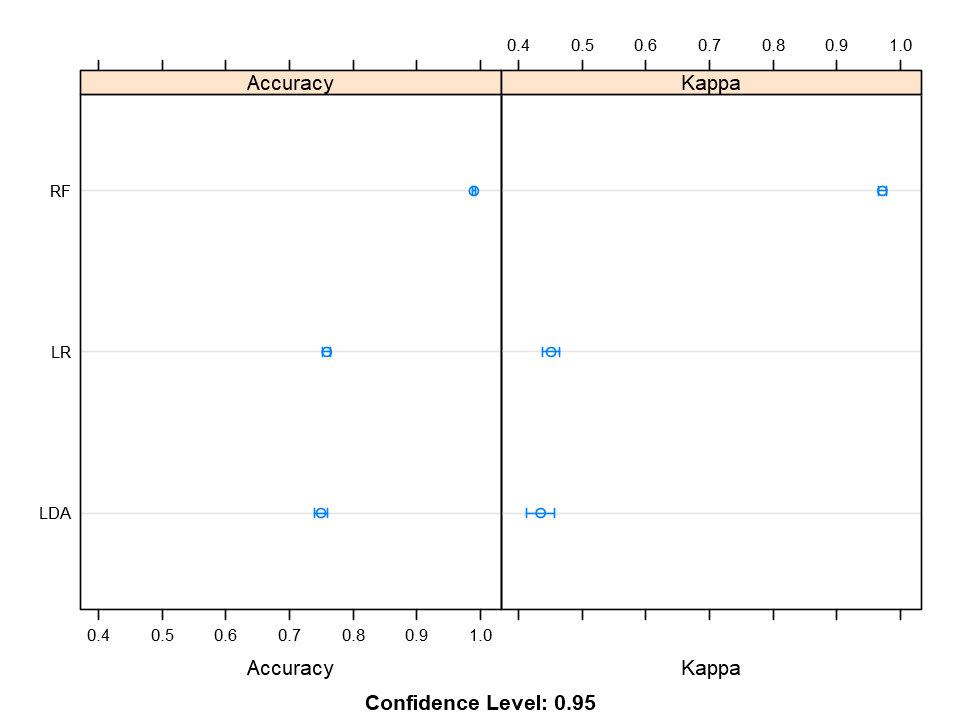

In [60]:
dotplot(results)

- We can notice that the random forest model by far is more accurate than the logistic regression and the linear discriminant analysis models.

In [61]:
ar.accuracy <- rbind(lr.accuracy, lda.accuracy, tree.accuracy, rf.accuracy)
df.accuracy<- as.data.frame(ar.accuracy)
colnames(df.accuracy)<-c("Test Accuracy")
df.accuracy

,Test Accuracy
,<dbl>
lr.accuracy,76.3
lda.accuracy,75.3
tree.accuracy,97.2
rf.accuracy,99.0


- As it seems, the model with the highest training and test accuracy is Random Forest.
- The variables with the highest importance scores (the ones that give the best prediction and contribute most to the model) are: Satisfaction Level and Time Spent In The Company 
 